In [19]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [20]:
today = date.today()
today

datetime.date(2023, 8, 7)

In [21]:
end_date = today.strftime("%Y-%m-%d")

In [22]:
start_date = (today - timedelta(days=365)).strftime("%Y-%m-%d")

In [23]:
data = yf.download('AMARAJABAT.NS', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", 
             "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail(10))

          Date        Open        High         Low       Close   Adj Close  \
236 2023-07-24  630.000000  630.000000  623.799988  625.049988  618.740417   
237 2023-07-25  629.000000  632.000000  621.950012  627.900024  621.561646   
238 2023-07-26  630.950012  633.799988  626.799988  632.900024  626.511169   
239 2023-07-27  634.950012  637.450012  631.000000  631.900024  628.700012   
240 2023-07-28  630.000000  631.450012  622.049988  624.400024  624.400024   
241 2023-07-31  624.400024  636.000000  622.000000  634.849976  634.849976   
242 2023-08-01  637.650024  643.700012  632.799988  641.450012  641.450012   
243 2023-08-02  640.799988  640.799988  631.500000  634.650024  634.650024   
244 2023-08-03  632.000000  632.900024  623.000000  624.750000  624.750000   
245 2023-08-04  628.299988  631.750000  623.400024  626.150024  626.150024   

      Volume  
236   594094  
237   823199  
238   584634  
239   478617  
240   533054  
241   932957  
242  1035791  
243   836766  
244   

In [24]:
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], high=data["High"],
                                        low=data["Low"], close=data["Close"])])
figure.update_layout(title = "Stock Price Analysis", xaxis_rangeslider_visible=True)
figure.show()

In [25]:
figure = px.bar(data, x='Date',y='Close')
figure.show()

In [26]:
figure = px.line(data, x= 'Date', y='Close')
figure.update_xaxes(rangeslider_visible = True)
figure.show()

In [27]:
figure = px.line(data, x = 'Date', y='Close')
figure.update_xaxes(rangebreaks = [dict(bounds=['sat','sun'])],
    rangeselector=dict(
        buttons = list([
            dict(count=5, label='5d', step='day', stepmode='backward'),
            dict(count=1, label='1m', step='month', stepmode='backward'),
            dict(count=3, label='3m', step='month', stepmode='backward'),
            dict(count=6, label='6m', step='month', stepmode='backward'),
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

Predictions

In [28]:
data = data[['Date','Close']]
data.tail()

,Date,Close
241,2023-07-31,634.849976
242,2023-08-01,641.450012
243,2023-08-02,634.650024
244,2023-08-03,624.750000
245,2023-08-04,626.150024


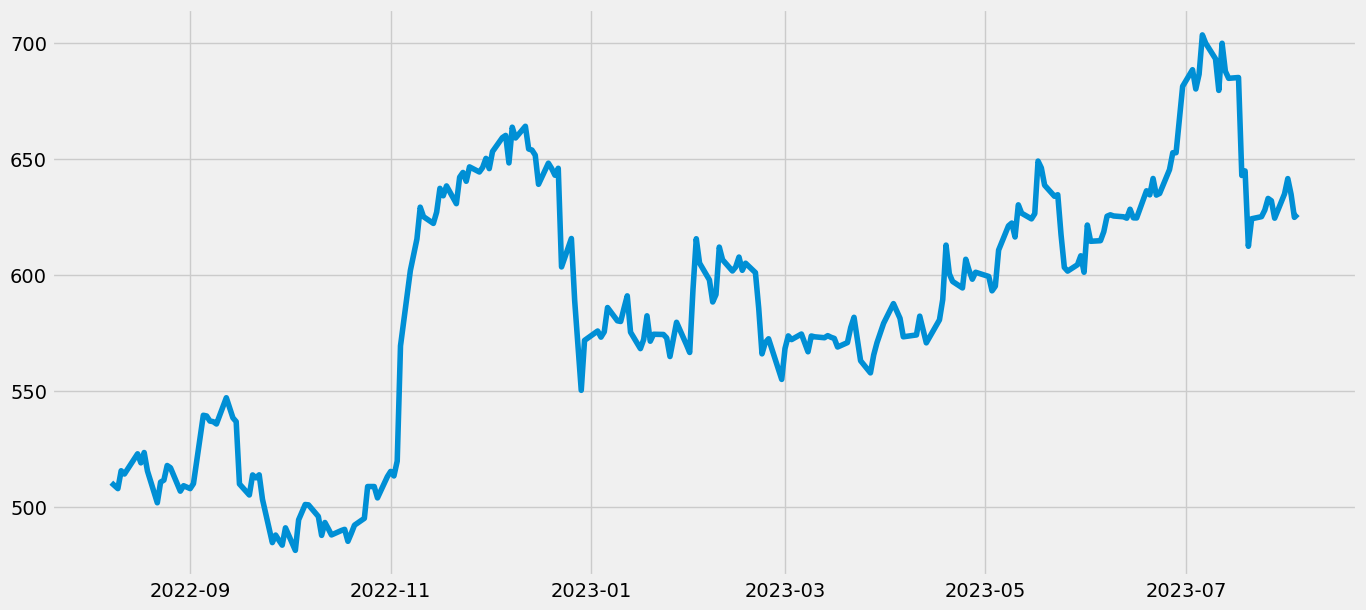

In [29]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
plt.plot(data['Date'], data['Close'])

<Figure size 640x480 with 0 Axes>

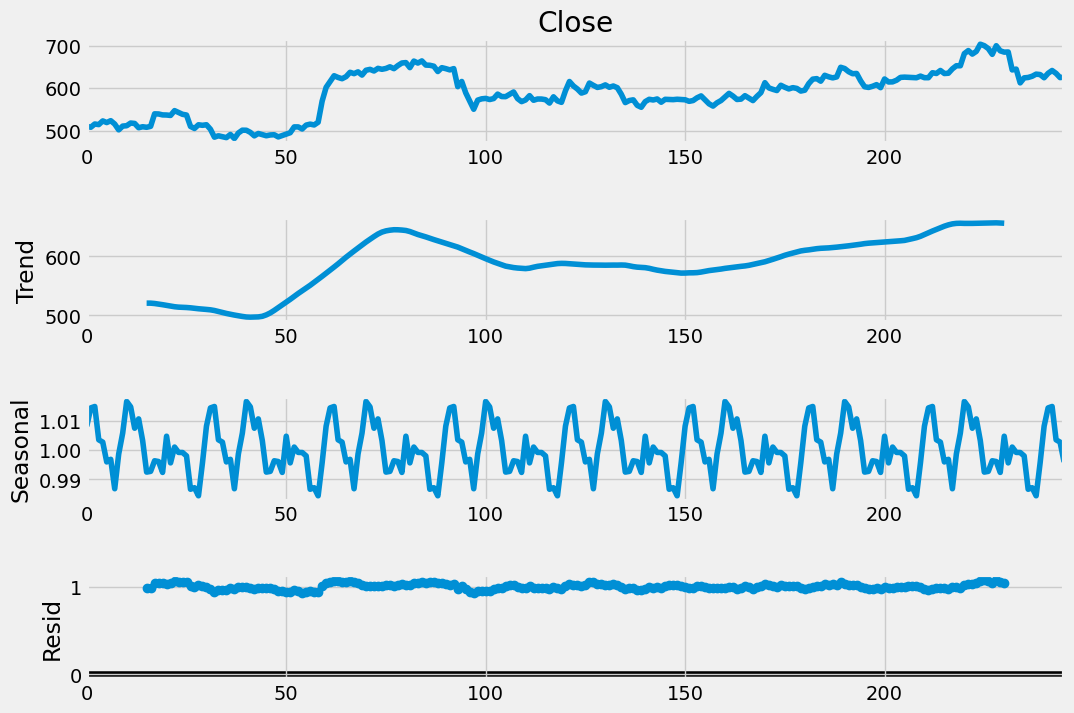

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['Close'], period = 30, model = 'multiplicative')
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12,8)

Find the p, d ,q

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

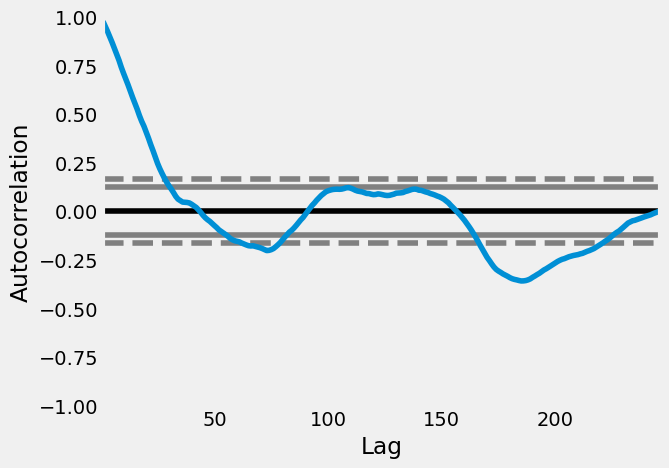

In [31]:
pd.plotting.autocorrelation_plot(data['Close'])

c:\Users\aksha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



<Figure size 1500x1000 with 0 Axes>

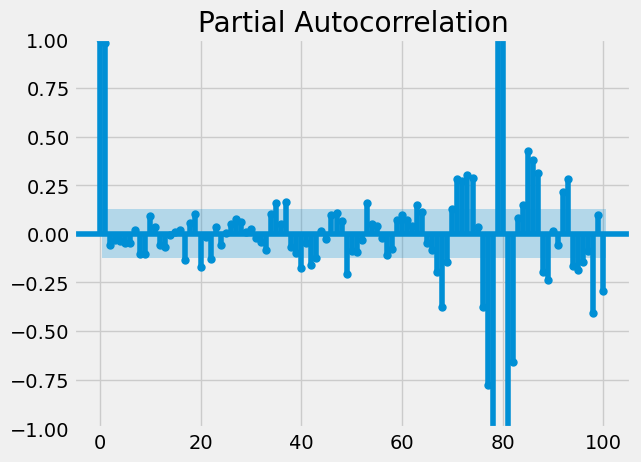

<Figure size 1500x1000 with 0 Axes>

In [32]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['Close'], lags= 100)
plt.figure(figsize= (15,10))

In [33]:
p, d, q = 3, 1, 4
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(data['Close'], order=(p,d,q), seasonal_order=(p,d,q,12))
fit = model.fit(disp=-1)
print(fit.summary())

c:\Users\aksha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  246
Model:             SARIMAX(3, 1, 4)x(3, 1, 4, 12)   Log Likelihood                -893.441
Date:                            Mon, 07 Aug 2023   AIC                           1816.883
Time:                                    15:56:01   BIC                           1868.648
Sample:                                         0   HQIC                          1837.757
                                            - 246                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0321      0.365     -2.826      0.005      -1.748      -0.316
ar.L2          0.5967      0.694   

In [34]:
forecast_steps = 20
forecast = fit.forecast(steps=forecast_steps)
print("Forecasted Values:", forecast)

Forecasted Values: 246    622.669836
247    620.845534
248    626.407504
249    628.400152
250    629.416445
251    623.912047
252    626.785625
253    625.036789
254    623.697030
255    618.496550
256    609.473302
257    612.603852
258    608.108988
259    607.078905
260    611.591368
261    614.251054
262    615.950250
263    615.720482
264    613.414088
265    618.659074
Name: predicted_mean, dtype: float64


<AxesSubplot:>

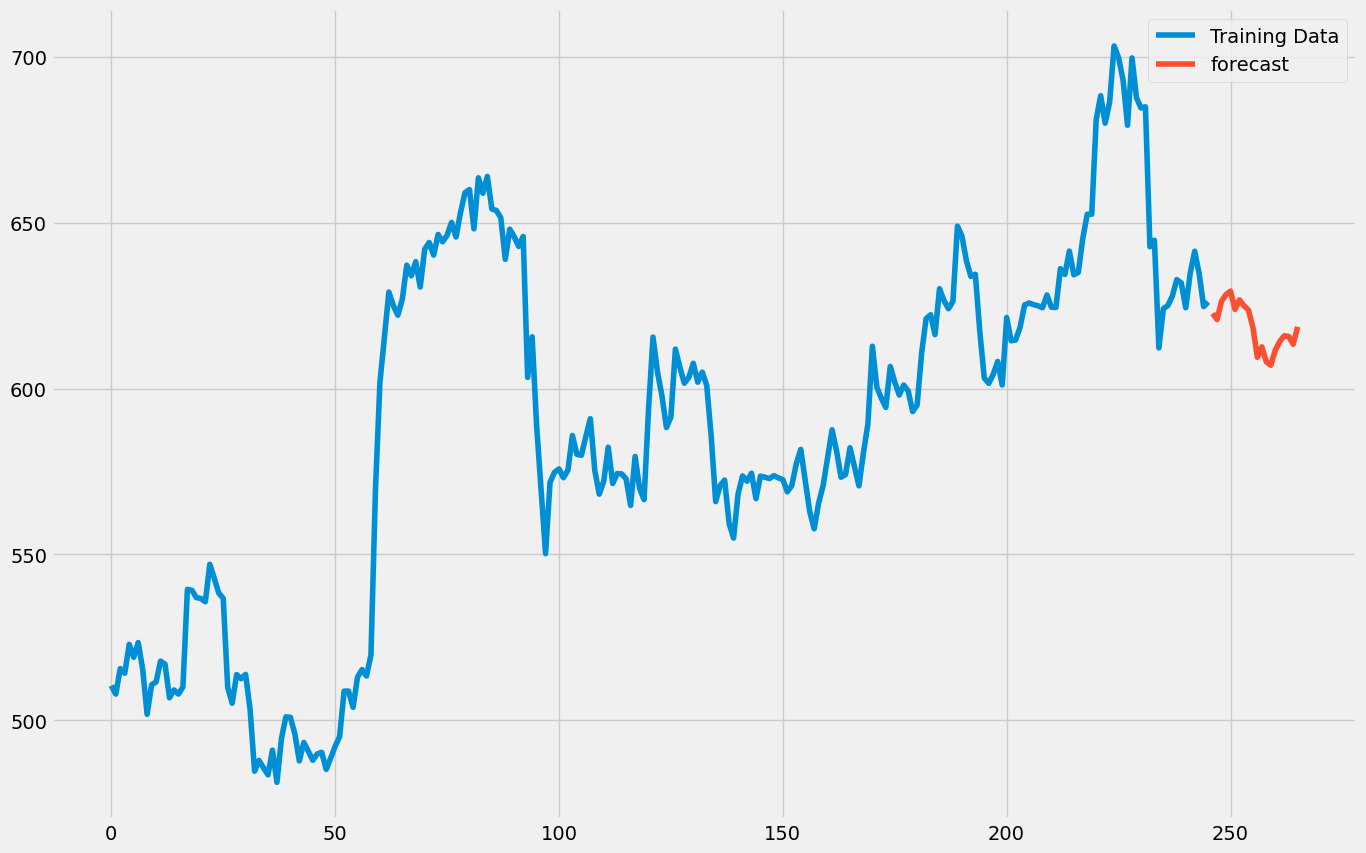

In [35]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
forecast.plot(legend=True, label="forecast")